Nama : Tri Mulyani Ayuningtyas

Kelas : JumaTec Class

### Tugas Nomor 1
Download gambar dari link di bawah ini menggunakan wget.

https://web.kominfo.go.id/sites/default/files/kominfo-setkab-jokowi-Kabinet-Indonesia-Maju-1.jpg

Buatlah deteksi wajah dari gambar tersebut menggunakan pre-trained model Haar Cascade.

Objective : Dapat mendeteksi semua wajah dari gambar tersebut
<br>

Hint : Rubah nilai scale factor dan min neighbors hingga mendapatkan hasil terbaik.

### Tugas Nomor 2
Download gambar dari link di bawah ini menggunakan wget.

https://russiabusinesstoday.com/wp-content/uploads/2018/01/russia-cars.jpg

Buatlah deteksi plat nomor mobil dari gambar tersebut menggunakan pre-trained model Haar Cascade.

Objective : Dapat mendeteksi plat nomor dari 3 mobil terdepan 

Hint : Rubah nilai scale factor dan min neighbors hingga mendapatkan hasil terbaik.

### Import OpenCV untuk implementasi Haar Cascade
Detail apa saja yang disediakan oleh opencv untuk cascade classifier itu bisa dilihat di dokumentasi opencv https://docs.opencv.org/4.x/
<br>
Referensi tambahan untuk Cascade Classifier di OpenCV:
- https://docs.opencv.org/3.4/db/d28/tutorial_cascade_classifier.html
- https://docs.opencv.org/3.4/dc/d88/tutorial_traincascade.html

In [ ]:
#kita akan gunakan haarcascade yang sudah ada
#download haarcascade classifier

!gdown "1PIX8seCgYcyR9R6vw1o88-v2QZ7YYH_J"

Downloading...
From: https://drive.google.com/uc?id=1PIX8seCgYcyR9R6vw1o88-v2QZ7YYH_J
To: /content/haarcascades.zip
100% 1.46M/1.46M [00:00<00:00, 172MB/s]


In [ ]:
#kita akan extract zip file yang berisi cascade classifier yang sudah didownload sebelumnya
!unzip "/content/haarcascades.zip"

Archive:  /content/haarcascades.zip
  inflating: haarcascade_eye.xml     
  inflating: haarcascade_eye_tree_eyeglasses.xml  
  inflating: haarcascade_frontalcatface.xml  
  inflating: haarcascade_frontalcatface_extended.xml  
  inflating: haarcascade_frontalface_alt.xml  
  inflating: haarcascade_frontalface_alt_tree.xml  
  inflating: haarcascade_frontalface_alt2.xml  
  inflating: haarcascade_frontalface_default.xml  
  inflating: haarcascade_fullbody.xml  
  inflating: haarcascade_lefteye_2splits.xml  
  inflating: haarcascade_licence_plate_rus_16stages.xml  
  inflating: haarcascade_lowerbody.xml  
  inflating: haarcascade_profileface.xml  
  inflating: haarcascade_righteye_2splits.xml  
  inflating: haarcascade_russian_plate_number.xml  
  inflating: haarcascade_smile.xml   
  inflating: haarcascade_upperbody.xml  


In [ ]:
#download library extension opencv yang lebih lengkap supaya bisa akses fitur haarcascade yang lebih lengkap
!wget -c "https://raw.githubusercontent.com/computationalcore/introduction-to-opencv/master/utils/common.py" -O "common.py"

--2022-10-13 13:57:27--  https://raw.githubusercontent.com/computationalcore/introduction-to-opencv/master/utils/common.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6572 (6.4K) [text/plain]
Saving to: ‘common.py’

common.py           100%[===================>]   6.42K  --.-KB/s    in 0s      

2022-10-13 13:57:27 (55.2 MB/s) - ‘common.py’ saved [6572/6572]



### Import Library yang akan digunakan
- OpenCV
- Numpy
- Matplotlib

In [ ]:
#import library
import cv2 #opencv
import numpy as np
import common #ini adalah extension yang sebelumnya kita download
import matplotlib.pyplot as plt

### Mencoba menggunakan Cascade Classifier

In [ ]:
#download bahan image
!wget -c "https://web.kominfo.go.id/sites/default/files/kominfo-setkab-jokowi-Kabinet-Indonesia-Maju-1.jpg"
!wget -c "https://russiabusinesstoday.com/wp-content/uploads/2018/01/russia-cars.jpg"

--2022-10-13 13:58:34--  https://web.kominfo.go.id/sites/default/files/kominfo-setkab-jokowi-Kabinet-Indonesia-Maju-1.jpg
Resolving web.kominfo.go.id (web.kominfo.go.id)... 45.60.34.49
Connecting to web.kominfo.go.id (web.kominfo.go.id)|45.60.34.49|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 216172 (211K) [image/jpeg]
Saving to: ‘kominfo-setkab-jokowi-Kabinet-Indonesia-Maju-1.jpg’

kominfo-setkab-joko 100%[===================>] 211.11K   688KB/s    in 0.3s    

2022-10-13 13:58:36 (688 KB/s) - ‘kominfo-setkab-jokowi-Kabinet-Indonesia-Maju-1.jpg’ saved [216172/216172]

--2022-10-13 13:58:36--  https://russiabusinesstoday.com/wp-content/uploads/2018/01/russia-cars.jpg
Resolving russiabusinesstoday.com (russiabusinesstoday.com)... 172.67.204.49, 104.21.22.104, 2606:4700:3033::6815:1668, ...
Connecting to russiabusinesstoday.com (russiabusinesstoday.com)|172.67.204.49|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 139042 (136K) [imag

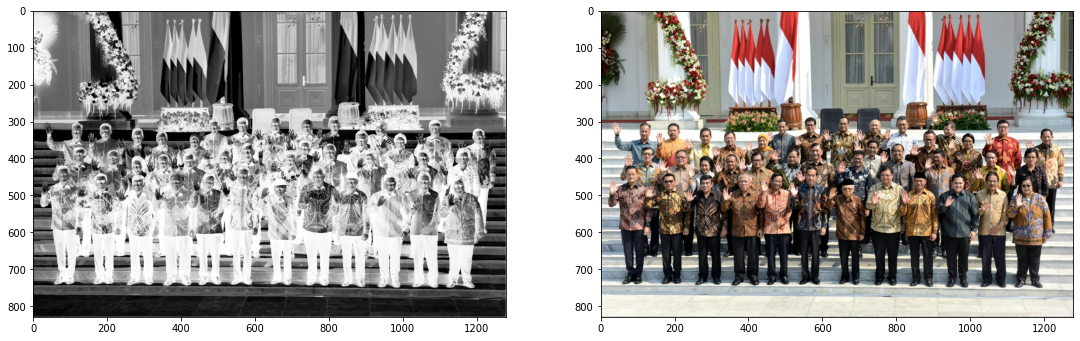

In [ ]:
#coba load image 1
base_image = cv2.imread("/content/kabinet.jpg")
gray_image = cv2.cvtColor(base_image, cv2.COLOR_BGR2GRAY) #kita convert ke image hitam putih untuk didetect oleh cascade classifier
rgb_image = cv2.cvtColor(base_image, cv2.COLOR_BGR2RGB) #kita akan gunakan untuk nampilin image dalam bentuk warna

plt.figure(figsize = (100,100))
plt.subplot(10,10, 1)
plt.imshow(gray_image, cmap= "Greys")

plt.subplot(10,10, 2)
plt.imshow(rgb_image)
plt.show()

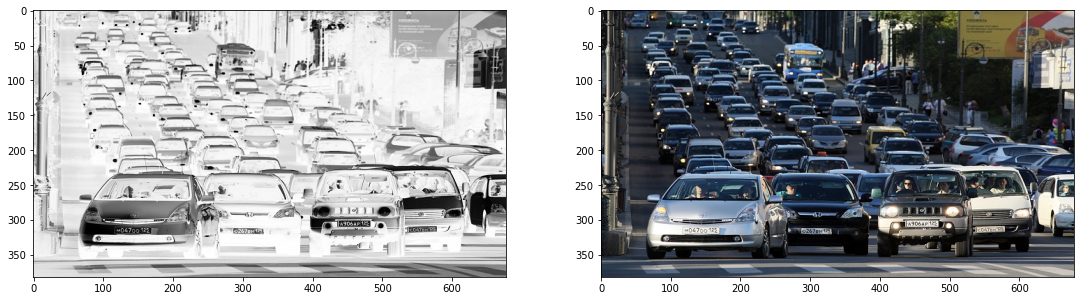

In [ ]:
#coba load image 2
base_image = cv2.imread("/content/russia-cars.jpg")
gray_image = cv2.cvtColor(base_image, cv2.COLOR_BGR2GRAY) #kita convert ke image hitam putih untuk didetect oleh cascade classifier
rgb_image = cv2.cvtColor(base_image, cv2.COLOR_BGR2RGB) #kita akan gunakan untuk nampilin image dalam bentuk warna

plt.figure(figsize = (100,100))
plt.subplot(10,10, 1)
plt.imshow(gray_image, cmap= "Greys")

plt.subplot(10,10, 2)
plt.imshow(rgb_image)
plt.show()

### Pakai Face Detection Classifier
- haarcascade_frontalface_default.xml

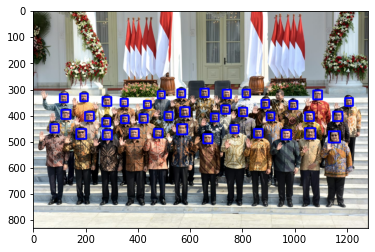

In [ ]:
test_image_family1 = cv2.imread("/content/kabinet.jpg") #load reference image yang akan didetect
test_image_family1_grey = cv2.cvtColor(test_image_family1, cv2.COLOR_BGR2GRAY) #convert to gray image

#load face classifier
face_classifier = cv2.CascadeClassifier("/content/haarcascade_frontalface_default.xml")
faces = face_classifier.detectMultiScale(test_image_family1_grey, 1.1, 5) #ngebuat prediksi dari classifier yang kita buat

for (x,y,w,h) in faces:
  cv2.rectangle(test_image_family1, (x,y), (x+w, y+h), (255,0,0), 5) #bikin bounding box

result = cv2.cvtColor(test_image_family1, cv2.COLOR_BGR2RGB)
plt.imshow(result)


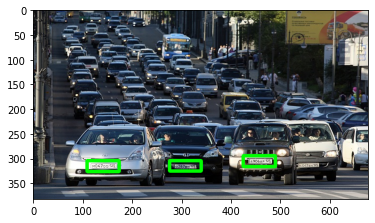

In [ ]:
test_image_family2 = cv2.imread("/content/russia-cars.jpg") #load reference image yang akan didetect
test_image_family2_grey = cv2.cvtColor(test_image_family2, cv2.COLOR_BGR2GRAY) #convert to gray image

#load face classifier
face_classifier = cv2.CascadeClassifier("/content/haarcascade_russian_plate_number.xml")
faces = face_classifier.detectMultiScale(test_image_family2_grey, 1.1, 5) #ngebuat prediksi dari classifier yang kita buat

for (x,y,w,h) in faces:
  cv2.rectangle(test_image_family2, (x,y), (x+w, y+h), (0,255,0), 5) #bikin bounding box

result = cv2.cvtColor(test_image_family2, cv2.COLOR_BGR2RGB)
plt.imshow(result)
